# Predicción de Ventas para PyMEs

En el contexto actual, las pequeñas y medianas empresas (PyMEs) enfrentan el desafío de anticipar su desempeño comercial en un entorno cada vez más competitivo. A menudo, estas organizaciones no cuentan con herramientas avanzadas para planificar sus ventas, lo que impacta negativamente en su toma de decisiones.

Este proyecto tiene como objetivo desarrollar un modelo predictivo que, a partir de información básica como el tipo de producto, precio, ciudad, forma de pago y tipo de cliente, permita estimar la cantidad de ventas que se pueden alcanzar. A través del análisis de datos históricos y la aplicación de técnicas de machine learning, se busca brindar una herramienta práctica y accesible que sirva como apoyo para la planificación comercial.

La audiencia principal de este análisis está compuesta por dueños de PyMEs, responsables comerciales y equipos de ventas que buscan optimizar sus recursos y prever sus ingresos futuros. Este modelo también puede ser útil para consultores o analistas de datos que deseen implementar soluciones predictivas en negocios de pequeña escala.


# Abstracto: Predicción de Ventas para PyMEs

En el contexto actual, las pequeñas y medianas empresas (PyMEs) enfrentan el desafío de anticipar su desempeño comercial en un entorno cada vez más competitivo. A menudo, estas organizaciones no cuentan con herramientas avanzadas para planificar sus ventas, lo que impacta negativamente en su toma de decisiones.

Este proyecto tiene como objetivo desarrollar un modelo predictivo que, a partir de información básica como el tipo de producto, precio, ciudad, forma de pago y tipo de cliente, permita estimar la cantidad de ventas que se pueden alcanzar. A través del análisis de datos históricos y la aplicación de técnicas de machine learning, se busca brindar una herramienta práctica y accesible que sirva como apoyo para la planificación comercial.

La audiencia principal de este análisis está compuesta por dueños de PyMEs, responsables comerciales y equipos de ventas que buscan optimizar sus recursos y prever sus ingresos futuros. Este modelo también puede ser útil para consultores o analistas de datos que deseen implementar soluciones predictivas en negocios de pequeña escala.


# Preguntas e hipótesis a responder

A continuación se presentan las principales preguntas que guiarán el análisis de los datos y el desarrollo del modelo predictivo:

- ¿Qué variables explican mejor la cantidad de ventas?
- ¿Cómo influyen el tipo de producto, la ciudad y el tipo de cliente en el volumen de ventas?
- ¿Se pueden anticipar los ingresos esperados en función de datos operativos básicos?
- ¿Qué combinaciones de variables generan los mayores niveles de ingreso?
- ¿Es posible construir un modelo que prediga de manera confiable la cantidad de ventas futuras a partir de un registro simple completado por un vendedor?

Estas preguntas nos permitirán estructurar el análisis exploratorio, el diseño del modelo predictivo y la interpretación de resultados con foco en la utilidad práctica para PyMEs.


### Nota:

El archivo `'Sales Dataset.csv'` fue obtenido desde una fuente pública y se trabaja localmente por practicidad.  
Una fuente posible de este dataset es: [Kaggle - Sample Sales Data](https://www.kaggle.com/datasets/kyanyoga/sample-sales-data)


In [66]:
import pandas as pd

# Cargar el dataset desde la ruta completa
df = pd.read_excel(r"C:\Users\jsgna\OneDrive\Desktop\Cursos\Data Science II\Entrega\Sales Dataset.xlsx")

# Ver las primeras filas
df.head()


,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month
0,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
1,B-26777,9726,1275,5,Electronics,Electronic Games,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12
2,B-26778,9726,1275,5,Electronics,Electronic Games,UPI,2021-07-25,Robert Stone,New York,Buffalo,2021-07
3,B-26779,4975,1330,14,Electronics,Printers,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
4,B-26780,4975,1330,14,Electronics,Printers,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12


In [67]:
# Ver forma del dataset
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

# Ver tipos de datos y nulos
df.info()

# Ver cantidad de valores nulos por columna
df.isnull().sum()


Filas: 10000, Columnas: 12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      10000 non-null  object        
 1   Amount        10000 non-null  int64         
 2   Profit        10000 non-null  int64         
 3   Quantity      10000 non-null  int64         
 4   Category      10000 non-null  object        
 5   Sub-Category  10000 non-null  object        
 6   PaymentMode   10000 non-null  object        
 7   Order Date    10000 non-null  datetime64[ns]
 8   CustomerName  10000 non-null  object        
 9   State         10000 non-null  object        
 10  City          10000 non-null  object        
 11  Year-Month    10000 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 937.6+ KB


Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
Order Date      0
CustomerName    0
State           0
City            0
Year-Month      0
dtype: int64

In [68]:
# Convertir Order Date a tipo fecha
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Verificar duplicados
print(f"Duplicados: {df.duplicated().sum()}")


Duplicados: 0


In [69]:
# Target
y = df['Quantity']

# Features seleccionadas
X = df[['Amount', 'Profit', 'Category', 'Sub-Category', 'PaymentMode', 'State', 'City']]


In [70]:
# One-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)


Ventas por Categoria

C:\Users\jsgna\AppData\Local\Temp\ipykernel_2080\3227618118.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Category', y='Quantity', estimator='mean', palette='Set2')


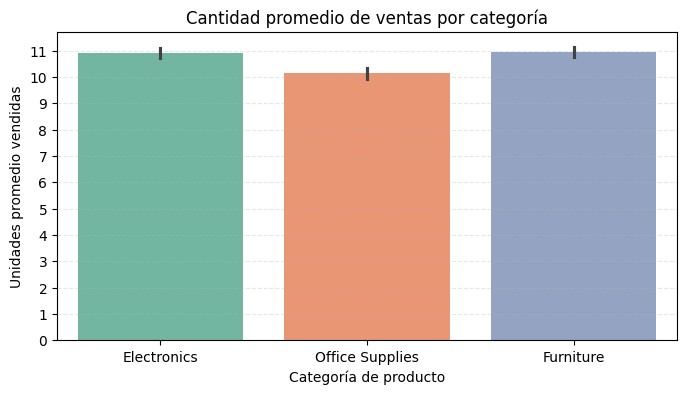

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 2. Cantidad promedio de ventas por categoría
plt.figure(figsize=(8, 4))
sns.barplot(data=df, x='Category', y='Quantity', estimator='mean', palette='Set2')
plt.title('Cantidad promedio de ventas por categoría')
plt.ylabel('Unidades promedio vendidas')
plt.xlabel('Categoría de producto')
max_val = df.groupby('Category')['Quantity'].mean().max()
plt.yticks(np.arange(0, int(max_val) + 2, 1))
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()






Ventas por Mes

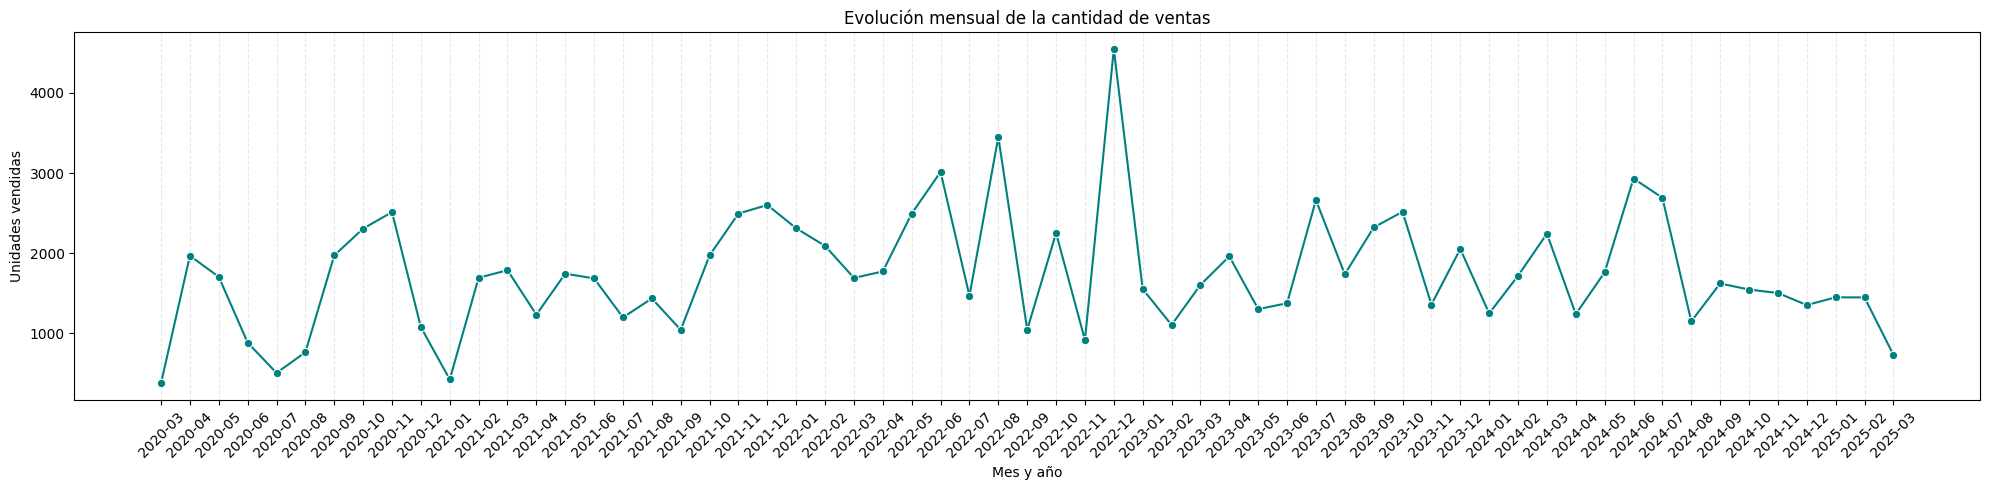

In [72]:
# Asegurarse de que la fecha esté en formato datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Crear una columna nueva con el año y mes
df['Year-Month'] = df['Order Date'].dt.to_period('M').astype(str)

# Agrupar por Year-Month y sumar la cantidad de ventas
ventas_mensuales = df.groupby('Year-Month')['Quantity'].sum().reset_index()

# Graficar
plt.figure(figsize=(20, 5))
sns.lineplot(data=ventas_mensuales, x='Year-Month', y='Quantity', marker='o', color='teal')
plt.title('Evolución mensual de la cantidad de ventas')
plt.xlabel('Mes y año')
plt.ylabel('Unidades vendidas')
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()





Rentabilidad por SubCategoria

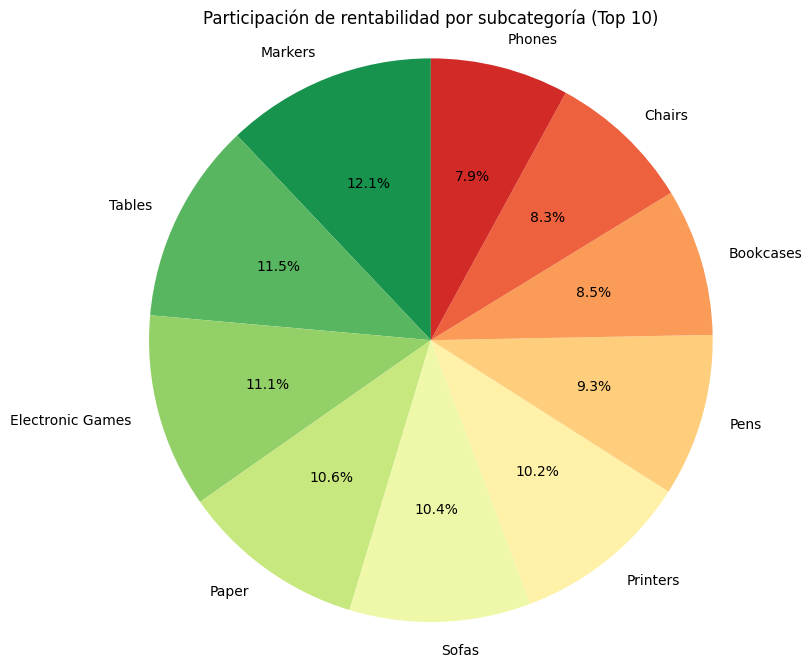

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Agrupar por subcategoría
rentabilidad_por_producto = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)

# Tomar el top 10 de productos más rentables
top_productos = rentabilidad_por_producto.head(10)

# Crear la paleta de colores del más rentable (verde) al menos rentable (rojo)
# Usamos 'RdYlGn' invertido (de verde a rojo)
colores = sns.color_palette("RdYlGn_r", n_colors=len(top_productos))

# Gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(top_productos, labels=top_productos.index, autopct='%1.1f%%',
        startangle=90, colors=colores)
plt.title('Participación de rentabilidad por subcategoría (Top 10)')
plt.axis('equal')
plt.show()

